In [1]:
# import libraries for working with arrays and DataFrames
import numpy as np
import pandas as pd
# import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# import functions for retrieving and cleaning telco dataset
from prepare import wrangle

In [2]:
train, validate, test = wrangle()

opening data from file


In [3]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check
1843,2676-ISHSF,Male,0,0,0,1,1,No,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
5717,8050-XGRVL,Female,0,1,1,62,1,No,Yes,No,...,0,0,0,1,0,0,0,1,0,0
1083,1576-PFZIW,Male,1,1,0,70,1,No,Yes,Yes,...,1,0,1,0,1,1,0,1,0,0
5210,7328-OWMOM,Female,0,0,1,31,1,No,No internet service,No internet service,...,0,1,0,1,0,0,1,1,0,0
2475,3541-ZNUHK,Female,0,1,1,55,1,Yes,Yes,Yes,...,0,0,0,0,0,1,0,0,1,0


In [4]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_male', 'multiple_lines_no_phone_service',
       'multiple_lines_yes', 'online_security_no_internet_service',
       'online_security_yes', 'online_backup_no_internet_service',
       'online_backup_yes', 'device_protection_no_internet_service',
       'device_protection_yes', 'tech_support_no_internet_service',
       'tech_support_yes', 'streaming_tv_no_internet_service',
       'streaming_tv_yes', 'streaming_movies_no_internet_service',
       'streaming_movies_yes', 'contract_type_one_year',
       'contract_type_two_year', 'internet_service_type_fiber_optic',
       'internet_service_type_non

In [17]:
cols = ['gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type']

In [18]:
cat_cols = ['gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing','contract_type', 'internet_service_type',
       'payment_type']

In [19]:
quant_cols = ['monthly_charges',
       'total_charges']

In [20]:
target = ['churn']

In [8]:
def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)

def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, target, cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, target, quant)

### Univariate

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats

def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


#### Bivariate

def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
    p = plot_cat_by_target(train, target, cat_var)

    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    plt.show(p)
    print("\n_____________________\n")

def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")

## Bivariate Categorical

def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

def plot_cat_by_target(train, target, cat_var):
    p = plt.figure(figsize=(2,2))
    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
    overall_rate = train[target].mean()
    p = plt.axhline(overall_rate, ls='--', color='gray')
    return p


## Bivariate Quant

def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

def plot_boxen(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.boxenplot(data=train, x=target, y=quant_var, color='lightseagreen')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

# alt_hyp = ‘two-sided’, ‘less’, ‘greater’

def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)


### Multivariate

def plot_all_continuous_vars(train, target, quant_vars):
    '''
    Melt the dataset to "long-form" representation
    boxenplot of measurement x value with color representing the target variable. 
    '''
    my_vars = [item for sublist in [quant_vars, [target]] for item in sublist]
    sns.set(style="whitegrid", palette="muted")
    melt = train[my_vars].melt(id_vars=target, var_name="measurement")
    plt.figure(figsize=(8,6))
    p = sns.boxenplot(x="measurement", y="value", hue=target, data=melt)
    p.set(yscale="log", xlabel='')    
    plt.show()

def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()

def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()

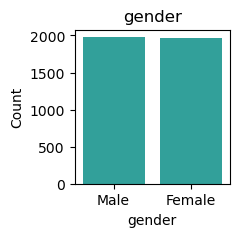

        gender  Count  Percent
Male      Male   1979    50.19
Female  Female   1964    49.81
_________________________________________________________________


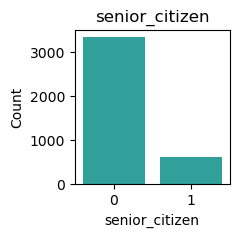

   senior_citizen  Count  Percent
0               0   3338    84.66
1               1    605    15.34
_________________________________________________________________


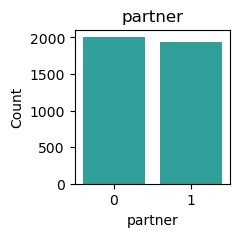

   partner  Count  Percent
0        0   2006    50.87
1        1   1937    49.13
_________________________________________________________________


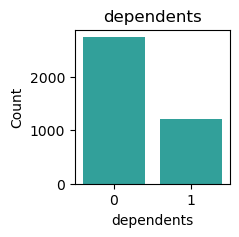

   dependents  Count  Percent
0           0   2741    69.52
1           1   1202    30.48
_________________________________________________________________


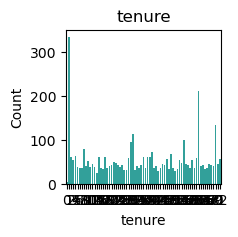

    tenure  Count  Percent
1        1    335     8.50
72      62    212     5.38
2       70    135     3.42
3       31    114     2.89
4       55     99     2.51
..     ...    ...      ...
45      27     31     0.79
28      43     30     0.76
31      51     28     0.71
36      14     25     0.63
0        0      5     0.13

[73 rows x 3 columns]
_________________________________________________________________


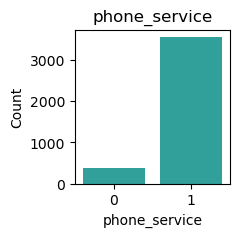

   phone_service  Count  Percent
1              1   3559    90.26
0              0    384     9.74
_________________________________________________________________


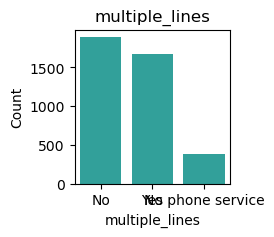

                    multiple_lines  Count  Percent
No                              No   1892    47.98
Yes                            Yes   1667    42.28
No phone service  No phone service    384     9.74
_________________________________________________________________


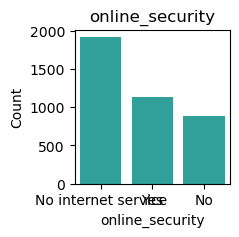

                         online_security  Count  Percent
No                   No internet service   1920    48.69
Yes                                  Yes   1139    28.89
No internet service                   No    884    22.42
_________________________________________________________________


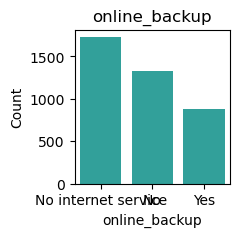

                           online_backup  Count  Percent
No                   No internet service   1729    43.85
Yes                                   No   1330    33.73
No internet service                  Yes    884    22.42
_________________________________________________________________


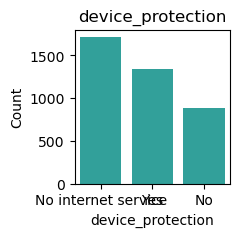

                       device_protection  Count  Percent
No                   No internet service   1715    43.49
Yes                                  Yes   1344    34.09
No internet service                   No    884    22.42
_________________________________________________________________


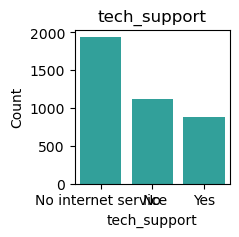

                            tech_support  Count  Percent
No                   No internet service   1940    49.20
Yes                                   No   1119    28.38
No internet service                  Yes    884    22.42
_________________________________________________________________


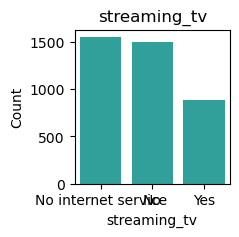

                            streaming_tv  Count  Percent
No                   No internet service   1554    39.41
Yes                                   No   1505    38.17
No internet service                  Yes    884    22.42
_________________________________________________________________


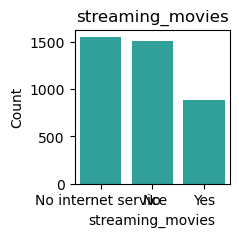

                        streaming_movies  Count  Percent
No                   No internet service   1553    39.39
Yes                                   No   1506    38.19
No internet service                  Yes    884    22.42
_________________________________________________________________


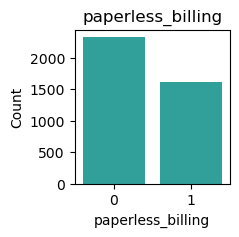

   paperless_billing  Count  Percent
1                  0   2330    59.09
0                  1   1613    40.91
_________________________________________________________________


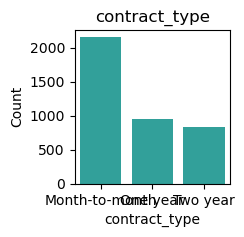

                 contract_type  Count  Percent
Month-to-month  Month-to-month   2155    54.65
Two year              One year    956    24.25
One year              Two year    832    21.10
_________________________________________________________________


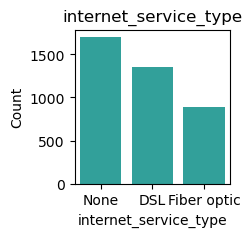

            internet_service_type  Count  Percent
Fiber optic                  None   1703    43.19
DSL                           DSL   1356    34.39
None                  Fiber optic    884    22.42
_________________________________________________________________


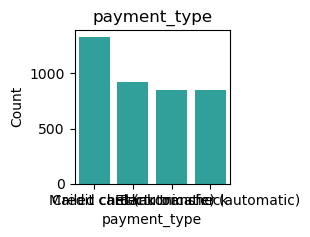

                                        payment_type  Count  Percent
Electronic check                        Mailed check   1329    33.71
Mailed check                 Credit card (automatic)    919    23.31
Credit card (automatic)             Electronic check    849    21.53
Bank transfer (automatic)  Bank transfer (automatic)    846    21.46
_________________________________________________________________


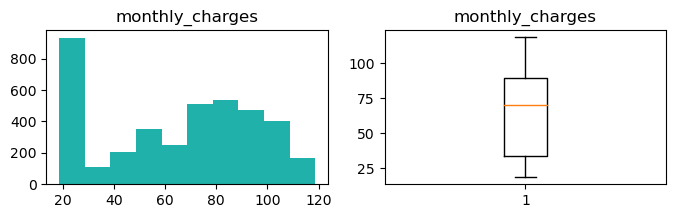

count    3943.000000
mean       64.215191
std        30.196023
min        18.550000
25%        34.000000
50%        70.150000
75%        89.600000
max       118.750000
Name: monthly_charges, dtype: float64


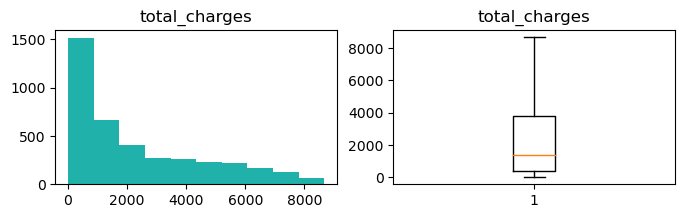

count    3943.000000
mean     2270.874068
std      2258.592385
min         0.000000
25%       385.450000
50%      1386.800000
75%      3809.375000
max      8672.450000
Name: total_charges, dtype: float64


In [25]:
explore_univariate(train, cat_cols, quant_cols)

gender 
_____________________

       chi2  p-value  degrees of freedom
0  0.156854  0.69207                   1

observed:
 churn      0     1   All
gender                  
Female  1437   527  1964
Male    1460   519  1979
All     2897  1046  3943

expected:
              0           1
0  1442.989602  521.010398
1  1454.010398  524.989602


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


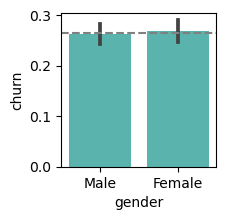

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



_____________________

senior_citizen 
_____________________

        chi2       p-value  degrees of freedom
0  92.331575  7.330533e-22                   1

observed:
 churn              0     1   All
senior_citizen                  
0               2549   789  3338
1                348   257   605
All             2897  1046  3943

expected:
              0           1
0  2452.494547  885.505453
1   444.505453  160.494547


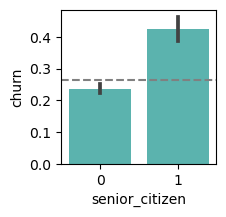


_____________________

partner 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  104.020252  2.002586e-24                   1

observed:
 churn       0     1   All
partner                  
0        1332   674  2006
1        1565   372  1937
All      2897  1046  3943

expected:
              0           1
0  1473.847832  532.152168
1  1423.152168  513.847832


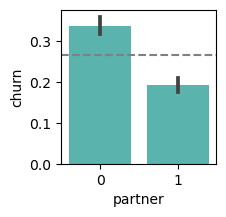


_____________________

dependents 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


        chi2       p-value  degrees of freedom
0  102.76203  3.779240e-24                   1

observed:
 churn          0     1   All
dependents                  
0           1884   857  2741
1           1013   189  1202
All         2897  1046  3943

expected:
              0           1
0  2013.866853  727.133147
1   883.133147  318.866853


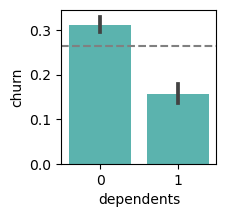


_____________________

tenure 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  621.745058  1.851831e-88                  72

observed:
 churn      0     1   All
tenure                  
0          5     0     5
1        127   208   335
2         66    69   135
3         59    55   114
4         52    47    99
...      ...   ...   ...
69        51     5    56
70        55     6    61
71        93     3    96
72       210     2   212
All     2897  1046  3943

[74 rows x 3 columns]

expected:
              0          1
0     3.673599   1.326401
1   246.131118  88.868882
2    99.187167  35.812833
3    83.758052  30.241948
4    72.737256  26.262744
..         ...        ...
68   43.348466  15.651534
69   41.144306  14.855694
70   44.817905  16.182095
71   70.533097  25.466903
72  155.760588  56.239412

[73 rows x 2 columns]


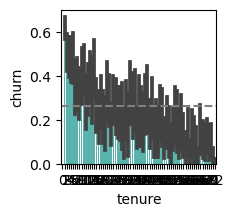


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  0.282377  0.595147                   1

observed:
 churn             0     1   All
phone_service                  
0               287    97   384
1              2610   949  3559
All            2897  1046  3943

expected:
              0           1
0   282.132387  101.867613
1  2614.867613  944.132387


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


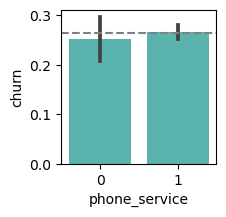


_____________________

multiple_lines 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


       chi2   p-value  degrees of freedom
0  7.646141  0.021861                   2

observed:
 churn                0     1   All
multiple_lines                    
No                1423   469  1892
No phone service   287    97   384
Yes               1187   480  1667
All               2897  1046  3943

expected:
              0           1
0  1390.089779  501.910221
1   282.132387  101.867613
2  1224.777834  442.222166


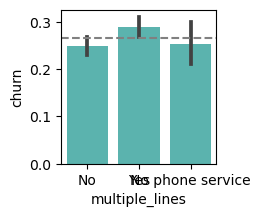


_____________________

online_security 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


        chi2        p-value  degrees of freedom
0  458.64298  2.552362e-100                   2

observed:
 churn                   0     1   All
online_security                      
No                   1120   800  1920
No internet service   819    65   884
Yes                   958   181  1139
All                  2897  1046  3943

expected:
              0           1
0  1410.661933  509.338067
1   649.492265  234.507735
2   836.845803  302.154197


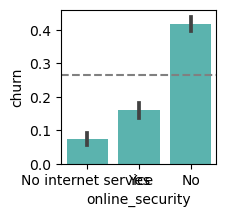


_____________________

online_backup 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  338.461835  3.191144e-74                   2

observed:
 churn                   0     1   All
online_backup                        
No                   1040   689  1729
No internet service   819    65   884
Yes                  1038   292  1330
All                  2897  1046  3943

expected:
              0           1
0  1270.330459  458.669541
1   649.492265  234.507735
2   977.177276  352.822724


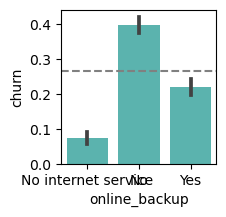


_____________________

device_protection 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  337.239959  5.878593e-74                   2

observed:
 churn                   0     1   All
device_protection                    
No                   1031   684  1715
No internet service   819    65   884
Yes                  1047   297  1344
All                  2897  1046  3943

expected:
              0           1
0  1260.044382  454.955618
1   649.492265  234.507735
2   987.463353  356.536647


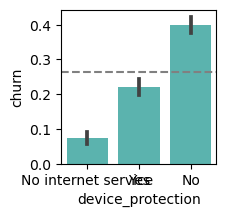


_____________________

tech_support 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2        p-value  degrees of freedom
0  472.812795  2.137992e-103                   2

observed:
 churn                   0     1   All
tech_support                         
No                   1129   811  1940
No internet service   819    65   884
Yes                   949   170  1119
All                  2897  1046  3943

expected:
              0           1
0  1425.356328  514.643672
1   649.492265  234.507735
2   822.151408  296.848592


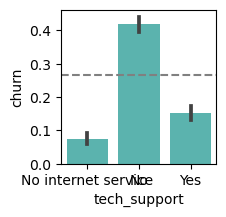


_____________________

streaming_tv 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  224.975868  1.403172e-49                   2

observed:
 churn                   0     1   All
streaming_tv                         
No                   1017   537  1554
No internet service   819    65   884
Yes                  1061   444  1505
All                  2897  1046  3943

expected:
              0           1
0  1141.754502  412.245498
1   649.492265  234.507735
2  1105.753234  399.246766


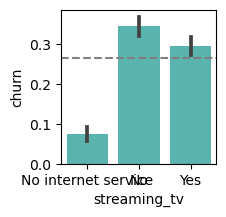


_____________________

streaming_movies 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  221.388676  8.434509e-49                   2

observed:
 churn                   0     1   All
streaming_movies                     
No                   1024   529  1553
No internet service   819    65   884
Yes                  1054   452  1506
All                  2897  1046  3943

expected:
              0           1
0  1141.019782  411.980218
1   649.492265  234.507735
2  1106.487953  399.512047


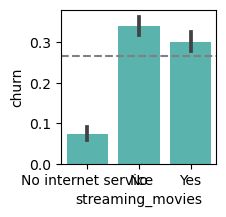


_____________________

paperless_billing 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  158.130797  2.897752e-36                   1

observed:
 churn                 0     1   All
paperless_billing                  
0                  1357   256  1613
1                  1540   790  2330
All                2897  1046  3943

expected:
              0           1
0  1185.102967  427.897033
1  1711.897033  618.102967


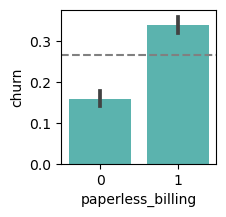


_____________________

contract_type 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2        p-value  degrees of freedom
0  662.831888  1.169188e-144                   2

observed:
 churn              0     1   All
contract_type                   
Month-to-month  1234   921  2155
One year         730   102   832
Two year         933    23   956
All             2897  1046  3943

expected:
              0           1
0  1583.321075  571.678925
1   611.286837  220.713163
2   702.392087  253.607913


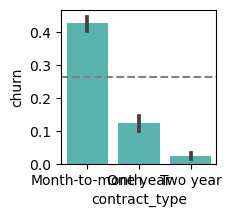


_____________________

internet_service_type 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  427.541884  1.446970e-93                   2

observed:
 churn                     0     1   All
internet_service_type                  
DSL                    1098   258  1356
Fiber optic             980   723  1703
None                    819    65   884
All                    2897  1046  3943

expected:
              0           1
0   996.279990  359.720010
1  1251.227745  451.772255
2   649.492265  234.507735


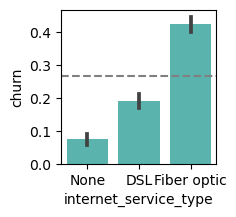


_____________________

payment_type 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  362.851922  2.458686e-78                   3

observed:
 churn                         0     1   All
payment_type                               
Bank transfer (automatic)   693   153   846
Credit card (automatic)     724   125   849
Electronic check            728   601  1329
Mailed check                752   167   919
All                        2897  1046  3943

expected:
             0           1
0  621.572914  224.427086
1  623.777073  225.222927
2  976.442556  352.557444
3  675.207456  243.792544


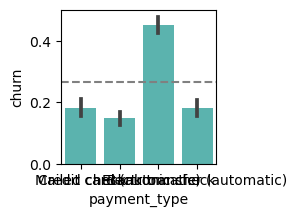


_____________________

monthly_charges 
____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


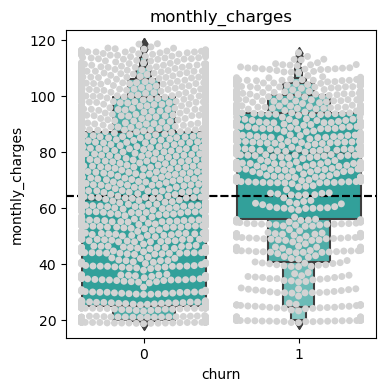

        count       mean        std    min      25%    50%   75%     max
churn                                                                   
0      2897.0  60.621212  31.199044  18.55  24.9500  62.65  87.1  118.75
1      1046.0  74.169073  24.638016  18.95  56.1375  79.55  94.0  115.55 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1139412.5, pvalue=1.1087802592201585e-32)

____________________

total_charges 
____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 75.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


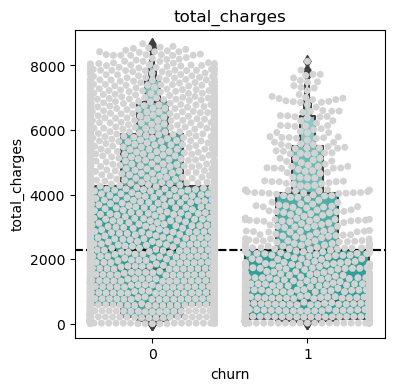

        count         mean          std   min      25%      50%       75%  \
churn                                                                       
0      2897.0  2540.176372  2323.241546   0.0  566.500  1709.15  4264.600   
1      1046.0  1525.014818  1878.121350  19.3  134.775   713.95  2286.075   

           max  
churn           
0      8672.45  
1      8127.60   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1968950.5, pvalue=6.890056841279286e-47)

____________________



In [23]:
explore_bivariate(train, 'churn', cat_cols, quant_cols)

- Do customers with both phone services and internet service churn less than average?
- Do customers with multiple phone lines churn less than customers with phone service on average?
- Do customers churn less with online security and online backup services than customers without?
- Do customers with device protection and tech support churn less than customers without?
- Does paperless billing have an effect on customer churn rate?
- Do customers with streaming tv have a lower churn rate than those without?
- Do customers with streaming movies have a lower churn rate than those without?
- Do customers with both streaming tv and streaming movies churn at a lower rate than customers on average?
- Is there a difference in churn among genders depending on if they have streaming tv or movie streaming?

In [84]:
# Do customers with both phone services and internet service churn less than 
# customers that only have one service?
train['phone_and_internet'] = ((train.phone_service == 1) 
                               & (train.internet_service_type_none == 0))

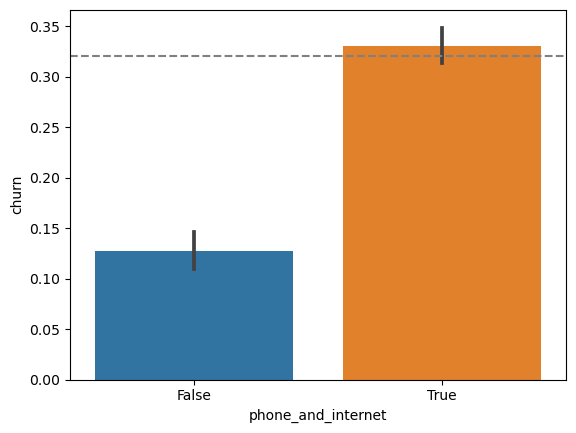

In [176]:
sns.barplot(data=train,
           x='phone_and_internet',
           y='churn')

plt.axhline(internet.churn.mean(), ls='--', color='gray')
plt.show()

customers with phone and internet service appear to churn at a rate around 20% higher than customers with only one service.

# Do customers churn less with online security and online backup services than customers without among customers with internet service?

H$_0$ : customers with online security and backup churn is >= than customers without these services among customers with internet service

H$_a$ : customers with online security and backup churn is < than customers without these services among customers with internet service

alpha: 0.05

In [111]:
alpha = 0.05

In [166]:
internet = train[train.online_backup_no_internet_service == 0]

In [170]:
internet

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check,phone_and_internet,security_and_backup
5717,8050-XGRVL,Female,0,1,1,62,1,No,Yes,No,...,0,1,0,0,0,1,0,0,True,False
1083,1576-PFZIW,Male,1,1,0,70,1,No,Yes,Yes,...,1,0,1,1,0,1,0,0,True,True
2475,3541-ZNUHK,Female,0,1,1,55,1,Yes,Yes,Yes,...,0,0,0,1,0,0,1,0,True,True
2350,3370-GQEAL,Male,0,1,1,30,1,Yes,No,No,...,0,0,0,1,0,0,1,0,True,False
2393,3422-LYEPQ,Male,0,1,1,1,1,No,No,No,...,0,0,0,1,0,0,1,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,5839-SUYVZ,Male,0,0,0,16,1,No,No,No,...,0,0,0,1,0,1,0,0,True,False
731,1078-TDCRN,Female,1,1,0,3,0,No phone service,No,Yes,...,0,0,0,0,0,0,1,0,False,False
2272,3249-VHRIP,Female,0,0,0,62,0,No phone service,No,Yes,...,1,0,1,0,0,1,0,0,False,False
6629,9419-IPPBE,Female,0,1,1,51,1,Yes,No,No,...,1,1,0,1,0,0,1,0,True,False


In [171]:
((internet.online_backup == 'Yes') & (internet.online_security == 'Yes'))

5717    False
1083     True
2475     True
2350    False
2393    False
        ...  
4128    False
731     False
2272    False
6629    False
5563     True
Length: 3059, dtype: bool

In [173]:
if ((internet.online_backup == 'Yes') & (internet.online_security == 'Yes')):
    internet['s_and_b'] = 'both'
elif ((internet.online_backup == 'Yes') & (internet.online_security == 'No')):
    internet['s_and_b'] = 'backup'
elif ((internet.online_backup == 'No') & (internet.online_security == 'Yes')):
    internet['s_and_b'] = 'security'
else:
    internet['s_and_b'] = 'neither'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [130]:
internet['security_and_backup'] = ((internet.online_backup == 'Yes') 
                                   & (internet.online_security == 'Yes'))

In [158]:
internet['neither_security_or_backup'] = ((internet.online_backup == 'No') 
                                   & (internet.online_security == 'No'))

In [159]:
internet

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check,phone_and_internet,security_and_backup,protection_and_tech,neither_security_or_backup
5717,8050-XGRVL,Female,0,1,1,62,1,No,Yes,No,...,0,0,0,1,0,0,True,False,False,False
1083,1576-PFZIW,Male,1,1,0,70,1,No,Yes,Yes,...,1,1,0,1,0,0,True,True,False,False
2475,3541-ZNUHK,Female,0,1,1,55,1,Yes,Yes,Yes,...,0,1,0,0,1,0,True,True,False,False
2350,3370-GQEAL,Male,0,1,1,30,1,Yes,No,No,...,0,1,0,0,1,0,True,False,False,True
2393,3422-LYEPQ,Male,0,1,1,1,1,No,No,No,...,0,1,0,0,1,0,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,5839-SUYVZ,Male,0,0,0,16,1,No,No,No,...,0,1,0,1,0,0,True,False,False,True
731,1078-TDCRN,Female,1,1,0,3,0,No phone service,No,Yes,...,0,0,0,0,1,0,False,False,False,False
2272,3249-VHRIP,Female,0,0,0,62,0,No phone service,No,Yes,...,1,0,0,1,0,0,False,False,False,False
6629,9419-IPPBE,Female,0,1,1,51,1,Yes,No,No,...,0,1,0,0,1,0,True,False,False,True


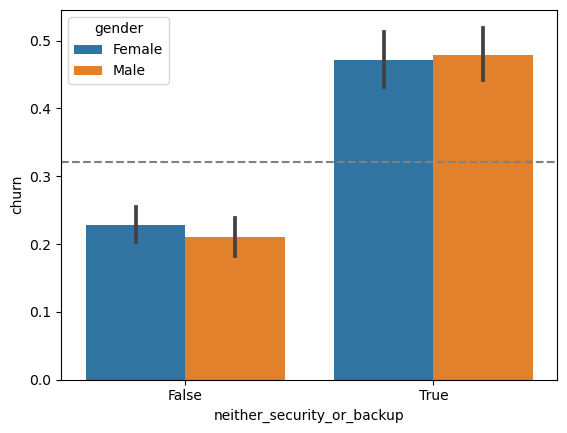

In [160]:
sns.barplot(data=internet,
            x='neither_security_or_backup',
            y='churn',
           hue='gender')
plt.axhline(internet.churn.mean(), ls='--', color='gray')
plt.show()

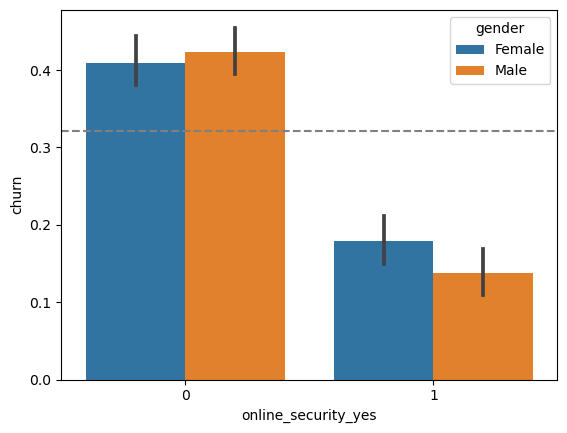

In [161]:
sns.barplot(data=internet,
            x='online_security_yes',
            y='churn',
           hue='gender')
plt.axhline(internet.churn.mean(), ls='--', color='gray')
plt.show()

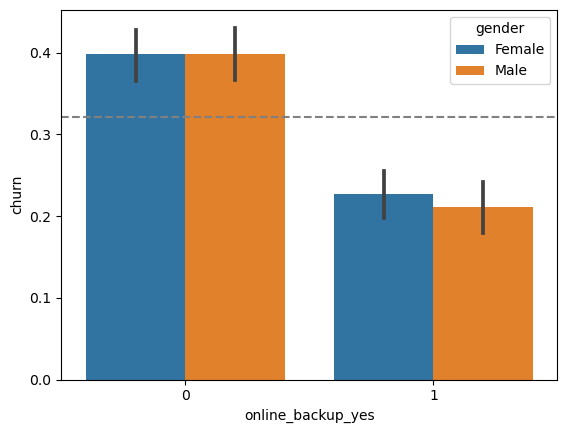

In [162]:
sns.barplot(data=internet,
            x='online_backup_yes',
            y='churn',
           hue='gender')
plt.axhline(internet.churn.mean(), ls='--', color='gray')
plt.show()

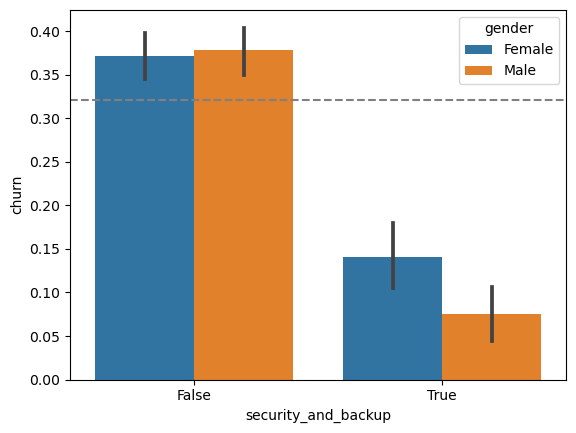

In [157]:
sns.barplot(data=internet,
            x='security_and_backup',
            y='churn',
           hue='gender')
plt.axhline(internet.churn.mean(), ls='--', color='gray')
plt.show()

In [110]:
t_stat, p = stats.ttest_ind(internet.security_and_backup, internet.churn)

In [131]:
if p < alpha:
    print('We are able to Reject our null hypothesis')
    print(f'p value is: {p}')
    print(f'the t-stat is: {t_stat}')
else:
    print('we Fail to reject our null hypothessis')
    print(f'p value is: {p}')

We are able to Reject our null hypothesis
p value is: 2.024356464381301e-25
the t-stat is: -10.466140200306429


In [139]:
# Do customers with device protection and tech support churn less than customers with?
internet['protection_and_tech'] = ((internet.device_protection_yes == 1) 
                        & internet.tech_support_yes == 1)

In [163]:
internet['neither_protection_or_tech'] = ((internet.device_protection_yes == 0) 
                        & internet.tech_support_yes == 0)

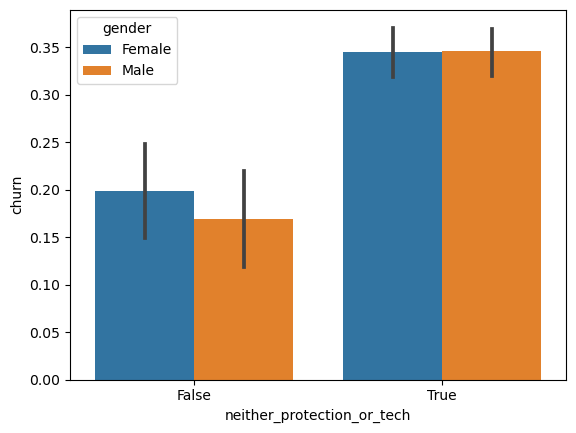

In [164]:
sns.barplot(data=internet,
            x='neither_protection_or_tech',
            y='churn',
           hue='gender')
plt.show()

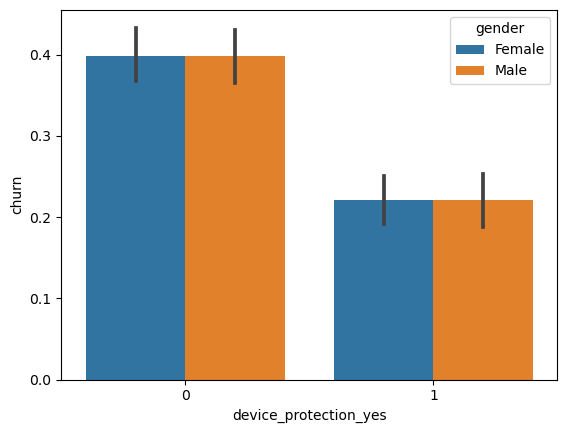

In [148]:
sns.barplot(data=internet,
            x='device_protection_yes',
            y='churn',
           hue='gender')
plt.show()

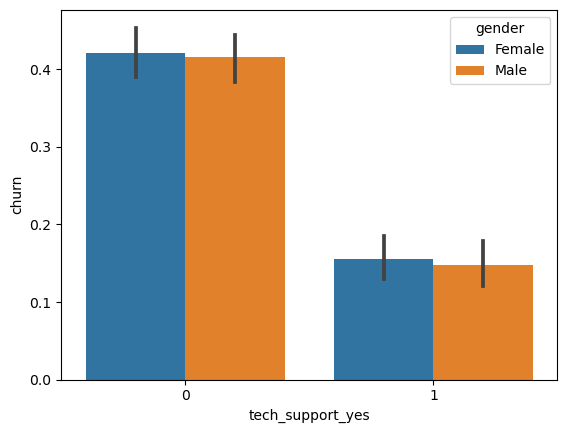

In [149]:
sns.barplot(data=internet,
            x='tech_support_yes',
            y='churn',
           hue='gender')
plt.show()

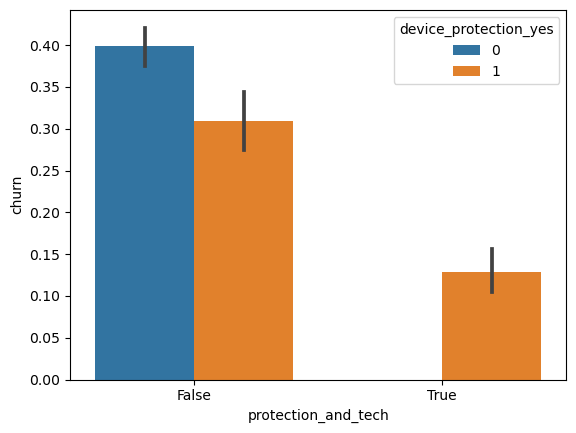

In [153]:
sns.barplot(data=internet,
            x='protection_and_tech',
            y='churn',
            hue='device_protection_yes')
plt.show()

In [175]:
pd.crosstab(train.online_backup, train.churn)

churn,0,1
online_backup,,
No,1040,689
No internet service,819,65
Yes,1038,292


In [174]:
# Does paperless billing have an effect on customer churn rate?
pd.crosstab(train.paperless_billing, train.churn)

churn,0,1
paperless_billing,,
0,1357,256
1,1540,790


In [ ]:
# Do customers with streaming tv have a lower churn rate than those without?
# Do customers with streaming movies have a lower churn rate than those without?
# Do customers with both streaming tv and streaming movies churn at a lower rate than customers on average?

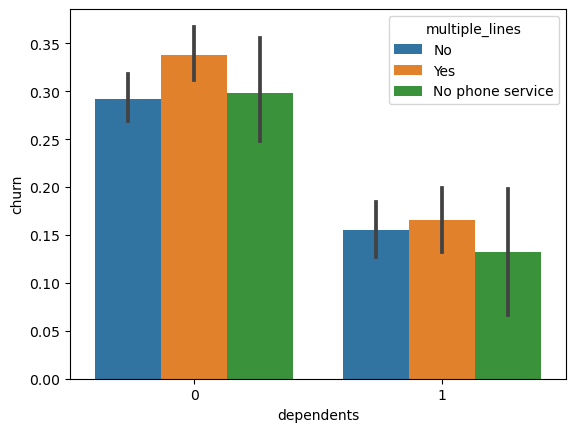

In [186]:
sns.barplot(data=train,
            x='dependents',
            y='churn',
           hue='multiple_lines')
plt.show()